<h1 align=center><font size = 7> Analysis of Poland missile strike </font></h1>

<h2 align=left><font size = 6> How to use python to analyze the available information </font></h2>

<h3 align=left><font size = 5>  </font> Background </h3>

At 15:40 (UTC+1) in the afternoon, on Tuesday November 15, 2022; a missile struck Polish territory. It landed in the vicinity of Przewodów, located near the border with Ukraine. The incident stirred international concern because of the ongoing conflict between Russia and Ukraine, with some seeing the strike as a Russian provocation and further escalation of the war. The incident even prompted some European nations to call for an Article 4 meeting of NATO to discuss a NATO response.

In the days since the strike, there have been opposing views on if this was an intentional Russian strike, or an unintentional consequence of war. One in which an errant Ukrainian air defense missile flew off-course and into Poland.  
  

<h3 align=left><font size = 5>  </font> Purpose </h3>

The purpose of this notebook is to analyze the available information using python, and the [folium](https://python-visualization.github.io/folium/) mapping package. [Jupyter Widgets](https://ipywidgets.readthedocs.io/en/latest/) will also be used to make the map interactive, providing for a detailed analysis of the information

This notebook will explore the facts we know as of **Sunday, November 20, 2022**. 

# Objective

To answer the following question: `Did the Russians fire a missile into Poland, and was it an intentional provocation?`. 

Considering that Russia is currently launching daily air attacks into Ukraine, it's important to understand if this missile was intentionally aimed at Poland, or did it strike there as an unintentional consequence of war?

# Methodology

The following methodology will be used in this analysis:

1. Gather relevant information (Data Mining) 
2. Asses the information (Describe the data)
3. Organize information into an analysis (EDA)

# The current situation

The following is a summary of information provided by Wikipedia, on their website related to the [2022 missile explosion in Poland](https://en.wikipedia.org/wiki/2022_missile_explosion_in_Poland):
1. The missle struck close to the village of [Przewodów](https://en.wikipedia.org/wiki/Przewod%C3%B3w), approximately 6km from the border between Poland and Ukraine.
2. Although there were initial reports of casualties, according to wikipedia, there were no casualties.
3. It's currently believed that it was a stray [S-300](https://en.wikipedia.org/wiki/S-300_missile_system) missle, fired by Ukrainian air defenses in an attempt to shoot down Russian drones, rockets and missles targeted against Ukrainian infrastructure.

However; Zelensky is steadfast that the missle was fired by Russia: 

* https://www.bbc.com/news/world-europe-63656664
* https://www.thesun.co.uk/news/20452990/zelensky-no-doubt-russian-missile-poland/
* https://www.telegraph.co.uk/world-news/2022/11/16/ukraine-russia-war-latest-news-putin-g20-missile-strike-przewodow/

Using the available information, this notebook will provide an opinion as to how a missle could have landed in Poland, and who likely fired it?

To start the analytics, let's use python to generate a map of the area, and drop a pin on the gps location of the missle strike. The GPS location is according to [wikipedia](https://en.wikipedia.org/wiki/2022_missile_explosion_in_Poland).

# Libraries used to run this notebook

The following python libraries are required to run this notebook. A brief description of the library is provided as comments.

In [1]:
# Mapping library
# https://python-visualization.github.io/folium/
import folium
from folium import plugins

In [2]:
# Library to create and handle tabular data
# Will be used to organize information used in generating map markers
# https://pandas.pydata.org/
import pandas as pd

In [3]:
# Library used to create interactive controls
# https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html#
import ipywidgets as widgets

# Interactive widgets

The following are interactive functions that will be used in this notebook. Refer to [Jupyter Widgets](https://ipywidgets.readthedocs.io/en/latest/) for an exploration of interactive controls in a notebook.

## Text box to clean GPS Cordinates

In [4]:
# Convert point copied from Lat/Long in map
# not used in the "inter-active" function below
lat_long_convert_widget = widgets.Text(#value = '',
                                       #placeholder = None,
                                       description = 'Convert',
                                       disabled = False,
                                       layout = {'width' : 'max-content'}
                                      )

# Set up mapping parameters

The following sections will set up the mapping parameters using python. This will allow us to configure the map for our requirements. Here the following is some of the information that will be analyzed using this map:

* Country borders(Poland, Ukraine, Belarus, Russia)
* GPS location of the reported missile strike
* The possible type of munitions used, and it's range

The [Folium](https://python-visualization.github.io/folium/quickstart.html#Markers) mapping python package will be used to create the map.

## Default location

A default location is used to center the map. The default location consists of two GPS coordinates stored in a python list [LAT, LONG]. Most online maps like Google Maps or Bing Maps allow you to copy/paste GPS coordinates from a pin location.

You can also copy/paste GPS locations from the map that will be generated.

In [5]:
# Center the map around a default location
# location near the boarder of Poland and Ukraine
default_location = [50.1910, 31.3550] 

## Create map object

The following script will create a `Map` object, centered around the `default_location` that was defined in the previous cell. A `Map` object holds the basic map parameters such as:
* Default zoom
* Location of map to center
* Basemap layer (what kind of base map to use)

The following are the default maps layers (called basemaps) available in `folium`:
* 'OpenStreetMap'
* 'Stamen Terrain'
* 'Stamen Toner'
* 'Stamen Watercolor'
* 'CartoDB dark_matter'

The following website has a list of free base maps that you can choose from: https://leaflet-extras.github.io/leaflet-providers/preview/. This [YouTube: 7 - Using GeoJSON with Folium - Web Mapping with Python Folium Basics](https://youtu.be/oTVqwN5ymKo) provides great instructions on how to use these base maps in folium.

In [6]:
# Create a map object
Map = folium.Map(location = default_location,
                 zoom_start = 5, # Higher numbers zoom in, smaller numbers zoom out
                 tiles =  'Stamen Toner', 
                                          # 'OpenStreetMap','Stamen Terrain', 'Stamen Toner',
                                          # 'Stamen Watercolor', 'CartoDB dark_matter'
                                          # Look at other maps here: https://leaflet-extras.github.io/leaflet-providers/preview/
                 #attr = 'Stamen Tiles',
                 )

## Add measuring distance tools

This section configures mapping tools that will allow you to measure distances on the map.

In [7]:
# Object to create tools that can measure distance
measure_control = plugins.MeasureControl(position = 'topleft', 
                                         active_color = 'red', 
                                         completed_color = 'green', 
                                         primary_length_unit = 'kilometers',  # 'feet', 'meters', 'miles', 'kilometers'
                                        )

In [8]:
# add measure control to map
Map.add_child(measure_control);

## Add drawing tools

In [9]:
# draw tools
# export=True exports the drawn shapes as a geojson file
draw = plugins.Draw(export = False)

In [10]:
# add draw tools to map
draw.add_to(Map);

In [11]:
# Add pop-ups of Lat / Long
Map.add_child(folium.LatLngPopup());

## Adding country borders

These borders have been downloaded as `GeoJson` files. The files were downloaded from the following website: https://cartographyvectors.com/

The borders of the following countries are going to be drawn on the map, to help assess the information:

* Poland (Red)
* Ukraine (Blue)
* Russia (Orange)
* Belarus (Green)

### Poland

In [12]:
# Load Polish border into memory
polish_geojson_file_path = './country_borders(json_files)/poland-detailed-boundary_1006.geojson'

In [13]:
# Add Polish border to the map
folium.GeoJson(data = polish_geojson_file_path, 
               name = "Poland",
               style_function = lambda x: {'fillColor' : 'pink', 'color' : 'red'}
               ).add_to(Map);

### Ukraine

In [14]:
# Load Ukrainian border into memory
ukraine_border_geojson_file_path = './country_borders(json_files)/ukraine-detailed-boundary_1059.geojson'

In [15]:
# Add Ukrainian border to the map
ukraine_border = folium.GeoJson(data = ukraine_border_geojson_file_path, 
                                name = "Ukraine",
                                ).add_to(Map);

### Russia

In [16]:
# Load Russian border into memory
russian_border_geojson_file_path = './country_borders(json_files)/russia-detailed-boundary_1012.geojson'

In [17]:
# Add Russian border to the map
russian_border = folium.GeoJson(data = russian_border_geojson_file_path, 
                                name = "Russia",
                                style_function = lambda x: {'fillColor' : 'orange', 'color' : 'orange'}
                                ).add_to(Map);

### Belarus

In [18]:
# Load Belarus border into memory
belarus_border_geojson_file_path = './country_borders(json_files)/belarus-detailed-boundary_860.geojson'

In [19]:
# Add Belarus border to the map
belarus_border = folium.GeoJson(data = belarus_border_geojson_file_path, 
                                name = "Belarus",
                                style_function = lambda x: {'fillColor' : 'green', 'color' : 'green'}
                                ).add_to(Map);

## Add map markers

A marker (pin) will be placed on the map, to show where the missile struck. The icon used is based on the available icons for folium.

Refer to the following locations for more icon options:

> https://fontawesome.com/icons?d=gallery

> Use with:`prefix = 'fa'`

> https://getbootstrap.com/docs/3.3/components/

### Missile strike map marker

A marker will be placed at the location of the missile strike.

In [20]:
# The GPS Coordinates of the reported missle strike location
# https://en.wikipedia.org/wiki/2022_missile_explosion_in_Poland
missle_strike_location = [50.47451589768359, 23.92307447603201]
                         # [50.51422508521426, 23.931591244862865] Original location, noticed it's now changed?

In [21]:
# Drop a pin on the location
# Red pin color
# Display the wiki web page link on popup
# Display "Missle strike location" when user hovers over marker 
folium.Marker(location = missle_strike_location,
              popup = "<a href = https://en.wikipedia.org/wiki/2022_missile_explosion_in_Poland > Wikipedia Aritcle </a>",
              icon = folium.Icon(color = 'red', # 'green', 'cadetblue', 'blue', 'white', 'darkblue', 'darkpurple', 'black', 'lightblue', 'pink', 'darkred', 'red', 'gray', 'beige', 'orange', 'darkgreen', 'lightred', 'lightgreen', 'purple', 'lightgray'
                                 prefix = 'glyphicon',
                                 icon = ' glyphicon-map-marker',
                                ),
              tooltip = "Missle strike location",
              ).add_to(Map);

# Display the map

The following map provides an initial assessment of the missile strike location, relative to the possible missile launch locations.

In [22]:
# Display the map
# Add pop-ups of Lat / Long
Map.add_child(folium.LatLngPopup())

# Analysis \#1

> It appears the missile strike happened very close to the border, according to **Image 1** below. 

> **Image 2** shows the distance to be only 6km from the border.

> In order to further assess, an understanding of ranges of possible drones, missiles, rockets is required. 

| Image 1                                                           |  Image 2                                                          |
|:-----------------------------------------------------------------:|:-----------------------------------------------------------------:|
| 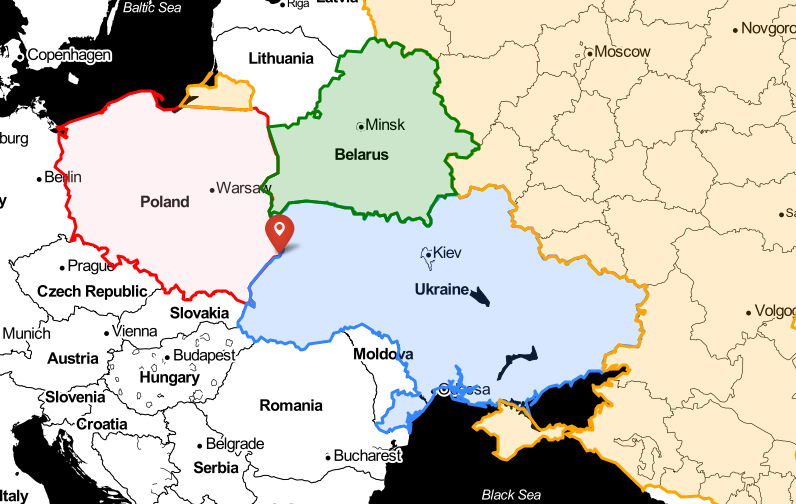 | 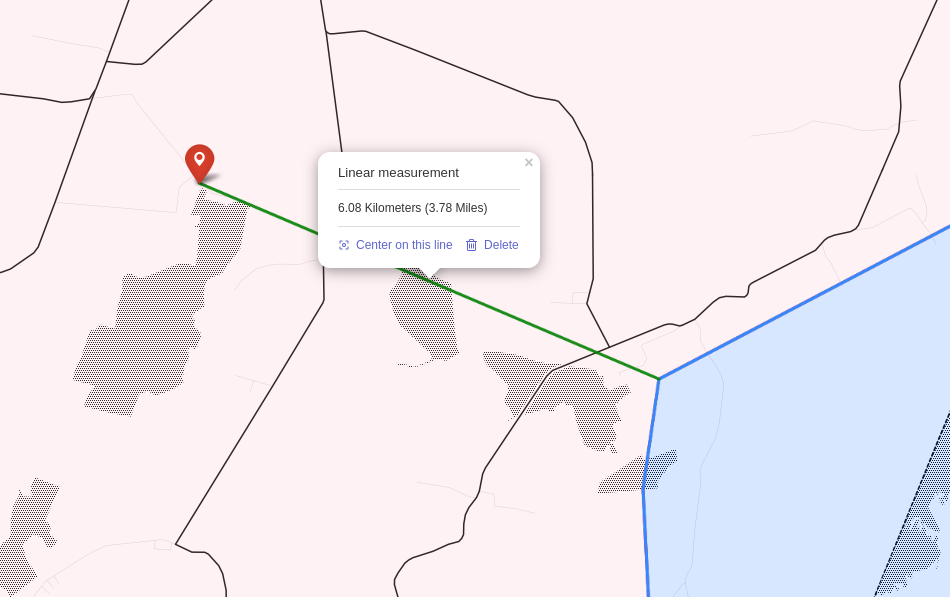 |

# Possible munitions used

According to [wikipedia](https://en.wikipedia.org/wiki/2022_missile_explosion_in_Poland) the possible munitions used in this attack are:

| Name                                                                     | Type                      | Range (km) |
|:-------------------------------------------------------------------------|:--------------------------|:----------:|
| [S-300 System](https://en.wikipedia.org/wiki/S-300_missile_system)       | Anti-Aircraft Missile     |  100       |
| [Kh-101](https://en.wikipedia.org/wiki/Kh-55#Kh-101/102_(X-101/102))     | Cruise Missile            | 5,500      |
| [Kh-55](https://en.wikipedia.org/wiki/Kh-55)                             | Cruise Missile            | 3,000      |
| [3M-54 Kalibr](https://en.wikipedia.org/wiki/3M-54_Kalibr)               | Cruise Missile            | 2,500      |
| [Kh-59](https://en.wikipedia.org/wiki/Kh-59)                             | Cruise Missile            | 290        |
| [Shahed 131](https://en.wikipedia.org/wiki/Shahed_131)                   | Autonomouse Drone         | 900        |               
| [HESA Shahed 136](https://en.wikipedia.org/wiki/HESA_Shahed_136)         | Autonomous Drone          | 2,500      |

Therefore; we can determine where the missiles originated by using these ranges and comparing possible launch locations.

## Creating interactive controls

In order to compare the ranges of these munitions, on the map, additional interactive controls are required. The following python code will be used to create radio-buttons. These buttons will allow a user to select between the different munition ranges for comparison on the map.

In [23]:
# List of munitions that a user will be able to select and check the radius
munitions_list = [None,
                  'S-300 SAM (100km)',
                  'Kh-59 Cruise Missile (300km)',
                  'Shahed 131 Autonomous Drone (900km)',
                  '3M-54 Kalibr Cruise Missile (2,500km)',
                  'Shahed 136 Autonomous Drone (2,500km)',
                  'Kh-55 Cuise Missile (3,000 km)',
                  'Kh-101 Cruise Missile (5,500 km)',
                 ]

In [24]:
# Radiobutton to allow the user to select a weapon range
munitions_radio_btn = widgets.RadioButtons(options = munitions_list,
                                           value = None, # Default value 
                                           layout = {'width': 'max-content'}, # If the items' names are long
                                           description = 'Weapon:',
                                           disabled = False
                                          )

# Display map function

The following function will display the map, along with the created `radio buttons`. You can use these `radio buttons` to select a weapon type. By selecting a weapon type, you'll see the range of that weapon on the map. By understanding the range of each weapon, one can make general assumptions on what kind of munition landed in Poland, and where it originated from.

This function uses the `@widgets.interact` decorator to map function parameters to inter-active widgets. In this case it's to the radio buttons.

In [25]:
# Generate a map, and link the function paramater to 
# a widget function that allows for interaction
@widgets.interact(weapon = munitions_radio_btn)
def generate_the_map(weapon):
    
    # Create a map object
    Map = folium.Map(location = default_location,
                     zoom_start = 5, # Higher numbers zoom in, smaller numbers zoom out
                     tiles =  'Stamen Toner', 
                                              # 'OpenStreetMap','Stamen Terrain', 'Stamen Toner',
                                              # 'Stamen Watercolor', 'CartoDB dark_matter'
                                              # Look at other maps here: https://leaflet-extras.github.io/leaflet-providers/preview/
                     #attr = 'Stamen Tiles',
                     )  
    
    # Object to create tools that can measure distance
    measure_control = plugins.MeasureControl(position = 'topleft', 
                                             active_color = 'red', 
                                             completed_color = 'green', 
                                             primary_length_unit = 'kilometers',  # 'feet', 'meters', 'miles', 'kilometers'
                                            )
    
    # add measure control to map
    Map.add_child(measure_control);
    
    # Load Polish border into memory
    polish_geojson_file_path = './country_borders(json_files)/poland-detailed-boundary_1006.geojson'
    # Add Poland's border to the map
    folium.GeoJson(data = polish_geojson_file_path, 
               name = "Poland",
               style_function = lambda x: {'fillColor' : 'pink', 'color' : 'red'}
               ).add_to(Map);
    
    # Load Ukraine border into memory
    ukraine_border_geojson_file_path = './country_borders(json_files)/ukraine-detailed-boundary_1059.geojson'
    # Add Ukraine's border to the map
    ukraine_border = folium.GeoJson(data = ukraine_border_geojson_file_path, 
                                name = "Ukraine",
                                ).add_to(Map);
    
    # Load Russian border into memory
    russian_border_geojson_file_path = './country_borders(json_files)/russia-detailed-boundary_1012.geojson'
    # Add Russian border to the map
    russian_border = folium.GeoJson(data = russian_border_geojson_file_path, 
                                name = "Russia",
                                style_function = lambda x: {'fillColor' : 'orange', 'color' : 'orange'}
                                ).add_to(Map);
    
    # Load Belarus border into memory
    belarus_border_geojson_file_path = './country_borders(json_files)/belarus-detailed-boundary_860.geojson'
    #Add Belarus border to the map
    belarus_border = folium.GeoJson(data = belarus_border_geojson_file_path, 
                                name = "Belarus",
                                style_function = lambda x: {'fillColor' : 'green', 'color' : 'green'}
                                ).add_to(Map);
     
    # Drop a pin on the location
    folium.Marker(location = missle_strike_location,
                  popup = "<a href = https://en.wikipedia.org/wiki/2022_missile_explosion_in_Poland > Wikipedia Aritcle </a> (Right Click Link)",
                  icon = folium.Icon(color = 'red', # 'green', 'cadetblue', 'blue', 'white', 'darkblue', 'darkpurple', 'black', 'lightblue', 'pink', 'darkred', 'red', 'gray', 'beige', 'orange', 'darkgreen', 'lightred', 'lightgreen', 'purple', 'lightgray'
                                     prefix = 'glyphicon',
                                     icon = ' glyphicon-map-marker',
                                    ),
                  tooltip = "Missle strike location",
                  ).add_to(Map);
    
    # The code below will draw a circle with a radius that depends on the chosen weapon
    # If no weapon is selected, no circle is drawn
    if weapon == None:
        pass
    
    if weapon == 'S-300 SAM (100km)':
        # Draw a circle with a radius of an S-300 missle
        # around the missle strike location
        folium.Circle(location = missle_strike_location,
                      radius = 100 * 1000,
                      popup = weapon,
                      color = "purple",
                      fill = True,
                      #fill_color = "purple",
                      ).add_to(Map);
        
    if weapon == 'Kh-59 Cruise Missile (300km)':
        # Draw a circle with a radius of an Kh-59 missle
        # around the missle strike location
        folium.Circle(location = missle_strike_location,
                      radius = 300 * 1000,
                      popup = weapon,
                      color = "purple",
                      fill = True,
                      #fill_color = "purple",
                      ).add_to(Map);
                
    if weapon == 'Shahed 131 Autonomous Drone (900km)':
        # Draw a circle with a radius of an Shahed 131
        # around the missle strike location
        folium.Circle(location = missle_strike_location,
                      radius = 900 * 1000,
                      popup = weapon,
                      color = "purple",
                      fill = True,
                      #fill_color = "purple",
                      ).add_to(Map); 
        
    if weapon == weapon == '3M-54 Kalibr Cruise Missle (2,500km)' or weapon == 'Shahed 136 Autonomous Drone (2,500km)':
        # Draw a circle with a radius of the range of the selected weapon
        # around the missle strike location
        folium.Circle(location = missle_strike_location,
                      radius = 2500 * 1000,
                      popup = weapon,
                      color = "purple",
                      fill = True,
                      #fill_color = "purple",
                      ).add_to(Map);     
        
    if weapon == weapon == 'Kh-55 Cuise Missle (3,000 km)':
        # Draw a circle with a radius of the range of the Kh-55 missle
        # around the missle strike location
        folium.Circle(location = missle_strike_location,
                      radius = 3000 * 1000,
                      popup = weapon,
                      color = "purple",
                      fill = True,
                      #fill_color = "purple",
                      ).add_to(Map); 
    
    if weapon == weapon == 'Kh-101 Cruise Missile (5,500 km)':
        # Draw a circle with a radius of the range of the Kh-101 missle
        # around the missle strike location
        folium.Circle(location = missle_strike_location,
                      radius = 5500 * 1000,
                      popup = weapon,
                      color = "purple",
                      fill = True,
                      #fill_color = "purple",
                      ).add_to(Map);  
    
    # Add pop-ups of Lat / Long
    return Map.add_child(folium.LatLngPopup())

interactive(children=(RadioButtons(description='Weapon:', layout=Layout(width='max-content'), options=(None, '…

## S-300 Anti-Air Missile

The [S-300](https://en.wikipedia.org/wiki/S-300_missile_system) anti-air missile system has a range of 100km. Given this range, the missile could not have come from Russia. For this analysis, an S-300V (SA-12) has been selected, according to wikipedia data.

| Image of Weapon                                                   | Range (According to strike location)                              |
|:-----------------------------------------------------------------:|:-----------------------------------------------------------------:|
|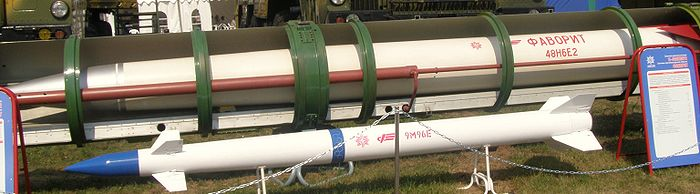  | 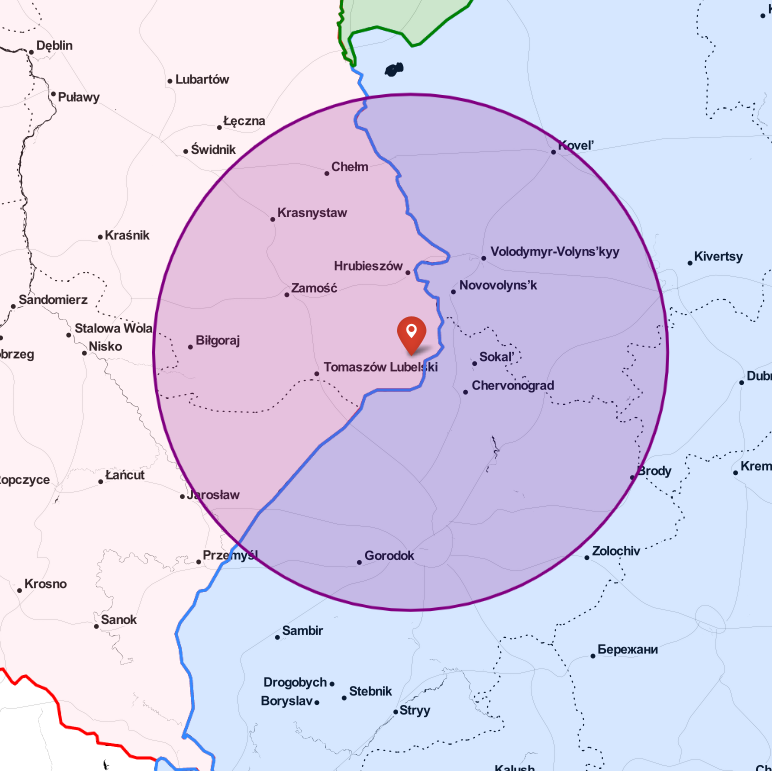 |

## Kh-59 Cruise Missile

The [Kh-59](https://en.wikipedia.org/wiki/Kh-59) is a cruise missile with a range of 290km. It's not possible for this missile to have originated in Russia. Belarus has not been implicated in this missile strike.

| Image of Weapon                                                   | Range (According to strike location)                              |
|:-----------------------------------------------------------------:|:-----------------------------------------------------------------:|
|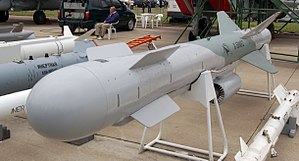  | 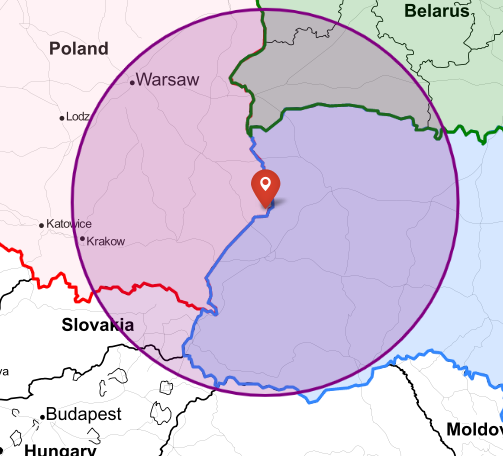 |

## Shahed 131 Autonomous Drone

The [Shahed 131 Autonomous Drone](https://en.wikipedia.org/wiki/Shahed_131) has a range of 900 km. This range is far enough for this weapon to have been launched from Russian territories.

| Image of Weapon                                                   | Range (According to strike location)                              |
|:-----------------------------------------------------------------:|:-----------------------------------------------------------------:|
|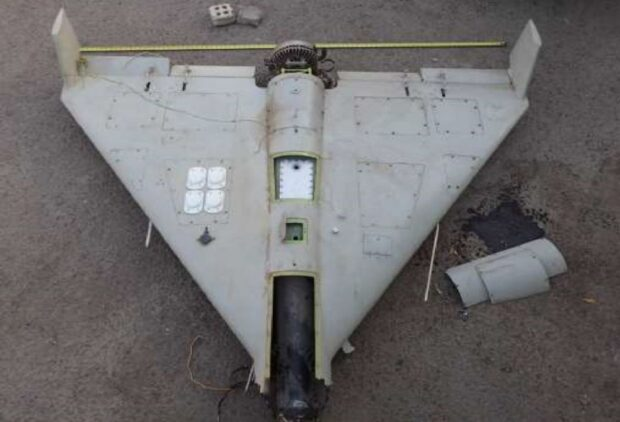  | 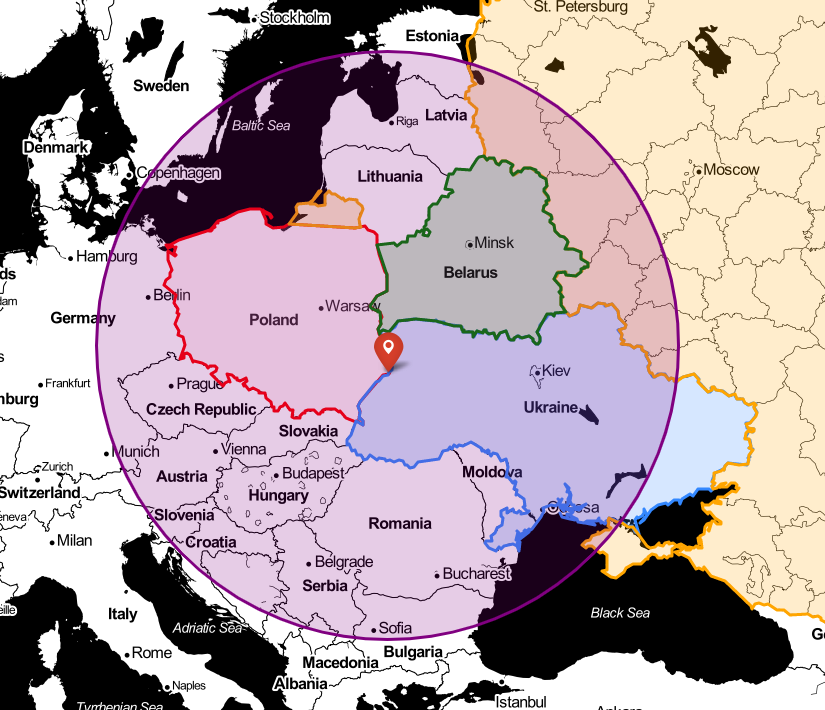 |

## 3M-54 Kalibr and Shahed 136

The [3M-54 Kalibr](https://en.wikipedia.org/wiki/3M-54_Kalibr) and the [Shahed 136](https://en.wikipedia.org/wiki/HESA_Shahed_136) have a range of 2,500 km. This range means that this missile could easily be fired from Russian territories.

| Image of Weapons                                                   | Range (According to strike location)                              |
|:-----------------------------------------------------------------:|:-----------------------------------------------------------------:|
|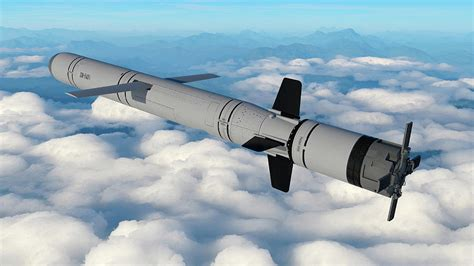 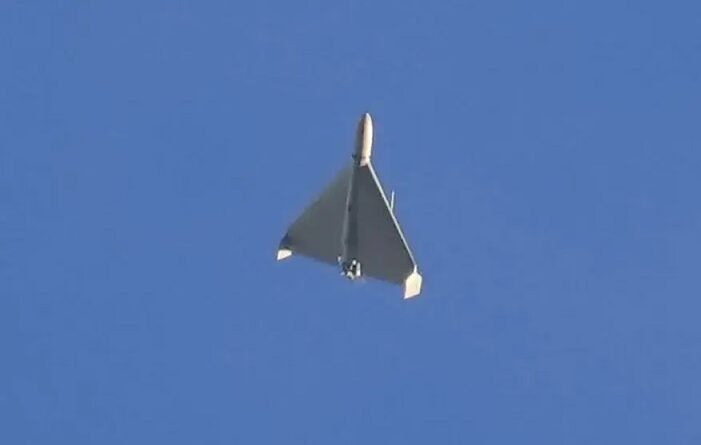 | 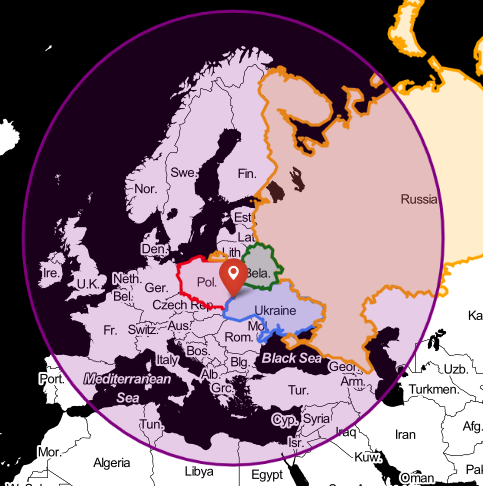 |

## Kh-55

The [Kh-555](https://en.wikipedia.org/wiki/Kh-55) has a range of 3,000 km. It can safely launch from deep inside Russian territory.

| Image of Weapon                                                   | Range (According to strike location)                              |
|:-----------------------------------------------------------------:|:-----------------------------------------------------------------:|
|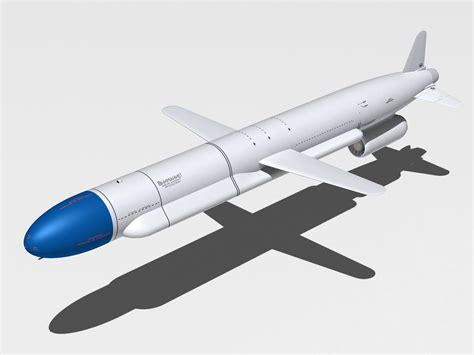 | 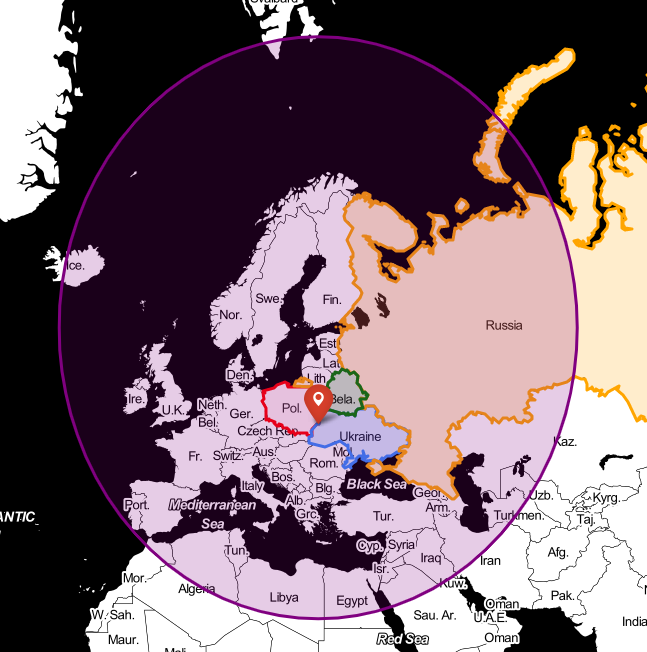 |

## Kh-101

The [Kh-101](https://en.wikipedia.org/wiki/Kh-55#Kh-101/102_(X-101/102)) has a range of 5,500km. This missile could be fired from deep within Russia. 

| Image of Weapon                                                   | Range (According to strike location)                              |
|:-----------------------------------------------------------------:|:-----------------------------------------------------------------:|
|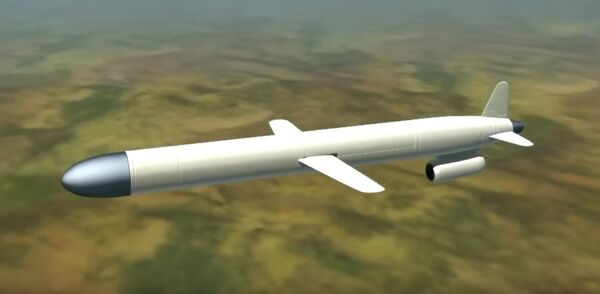  | 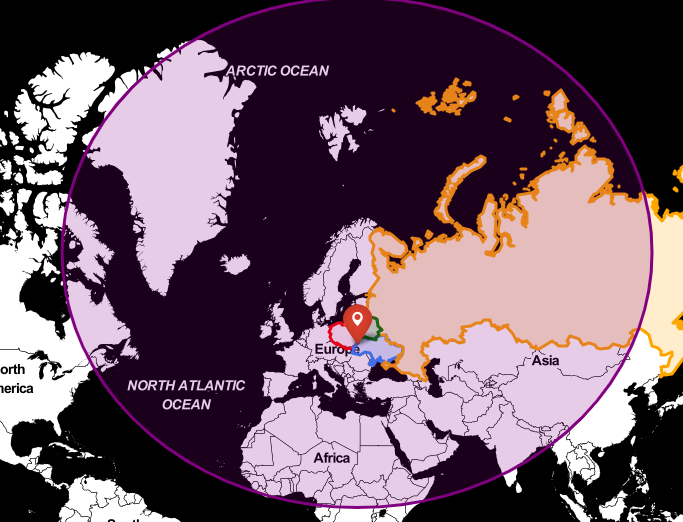 |

# Analysis \#2

Russia has the weapons with more than sufficient range to hit Polish territories. Any weapons with a range >1,000km can be safely launched from Russia. Therefore; the next series of questions that have to be asked are:

1. Can the missile be identified by the debris left behind?
2. Is the area in close proximity to locations that Russia has been attacking in Ukraine?
3. Was the area of the missile strike an area of significance? In other words, was there anything at the Polish location that could be identified as a military target by Russia?

# Missile debris

According to current reports (November 19, 2022), there is strong evidence to suggest that it was an S-300 missile. It's hard to find photos online, but to date [wikipedia](https://en.wikipedia.org/wiki/2022_missile_explosion_in_Poland) is still suggesting that it was an S-300 missile.

**No conclusion** can be drawn based on this evidence. The missile or drone would need to be positively identified using pictures of the debris. These pictures would show the markings and identifications normally found on military weapons. 

# Russian targeted locations in Ukraine

The [2022 Russian invasion of Ukraine wikipedia page](https://en.wikipedia.org/wiki/2022_Russian_invasion_of_Ukraine) provides a curation of locations that have been targeted so far by Russia. 

Another source of information is the following website that shows military locations near the Polish / Ukraine border: [Map of Ukrainian Military Bases and Russian Forces located near Ukraine’s borders](https://theaviationist.com/2014/03/11/map-ukrainian-forces/), it is quite dated though (2014).

| Russian targeted locations                                        | Military targets                                                  |
|:-----------------------------------------------------------------:|:-----------------------------------------------------------------:|
|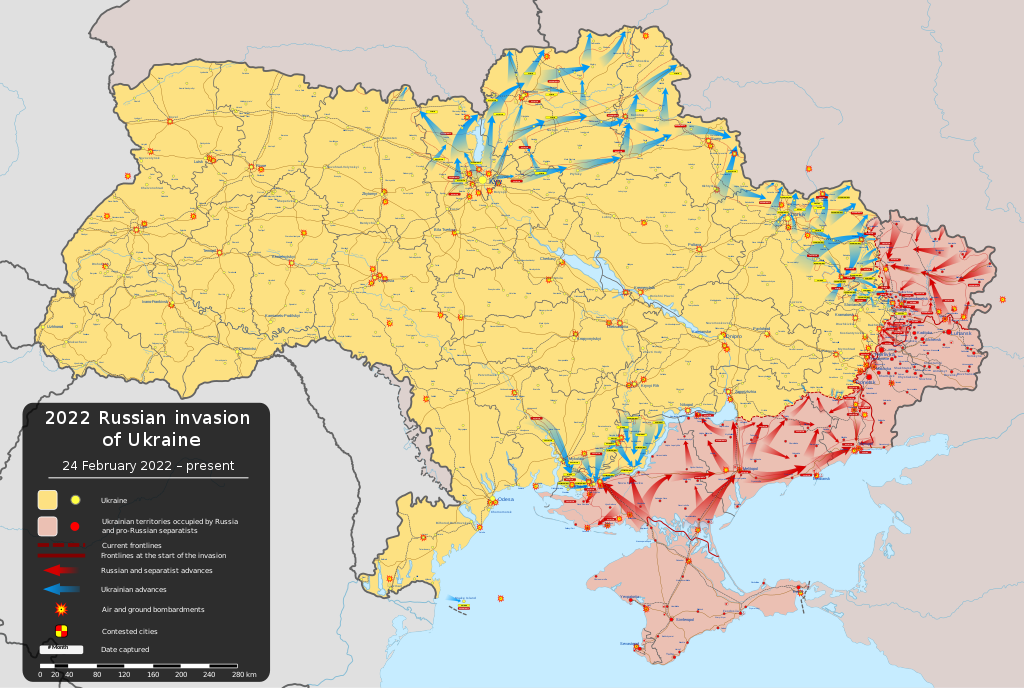  | 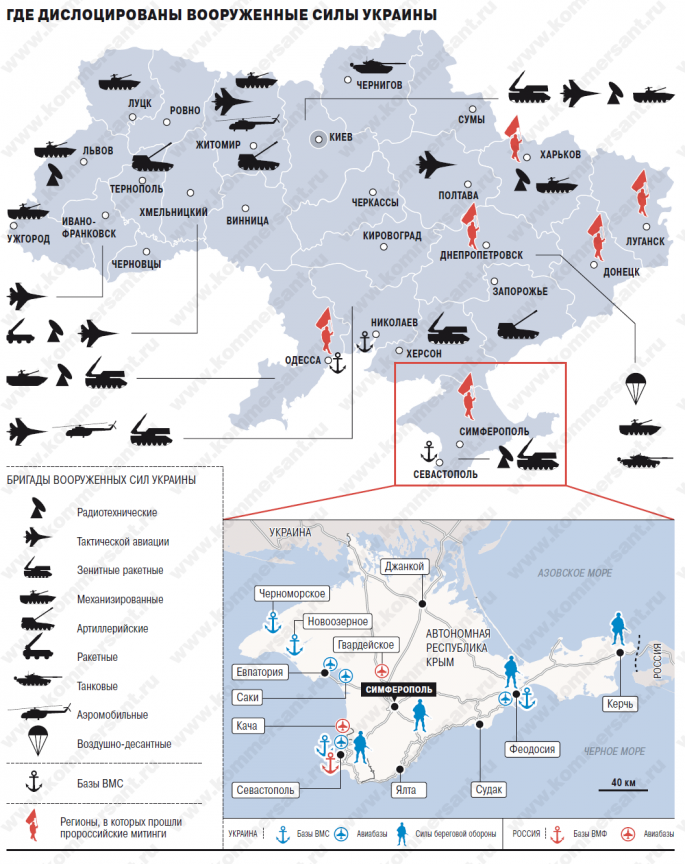 |

The following images show a better approximation of the potential targets close to the vicinity of the missle strike.

| Russian targeted locations                                        | Military targets near Poland                                      |
|:-----------------------------------------------------------------:|:-----------------------------------------------------------------:|
|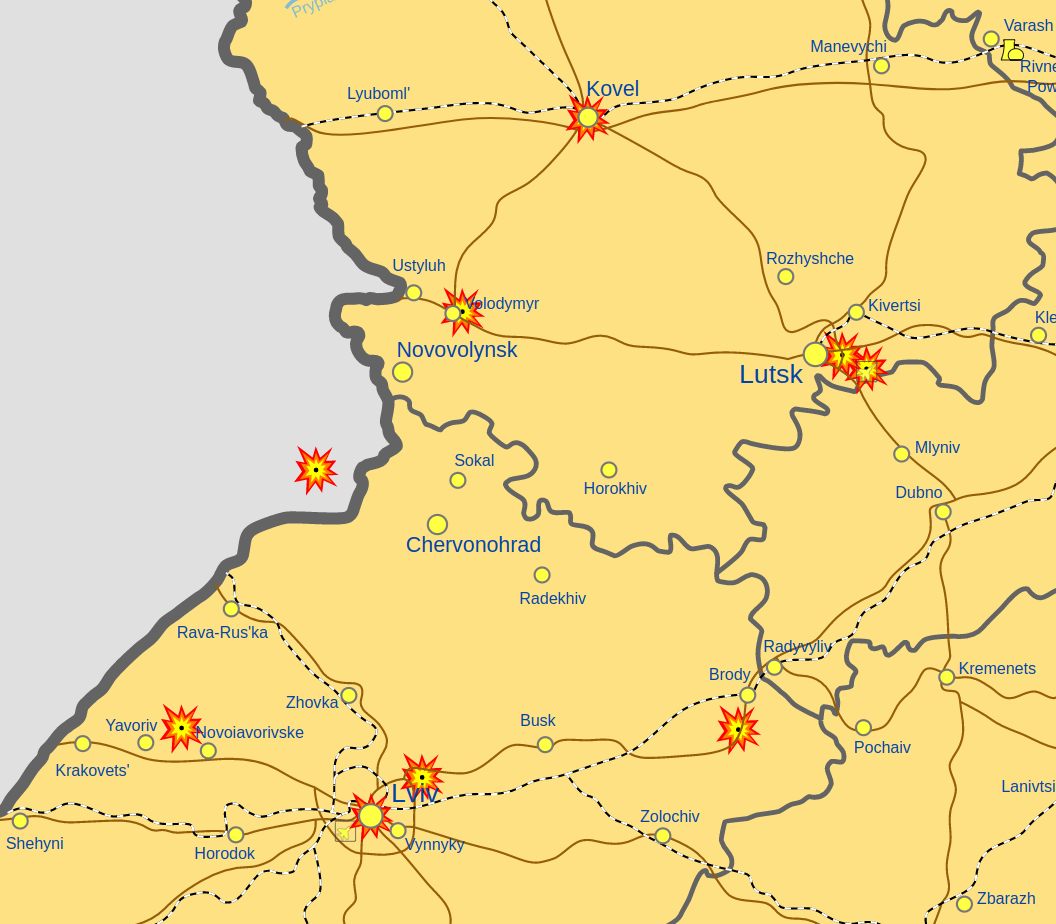  | 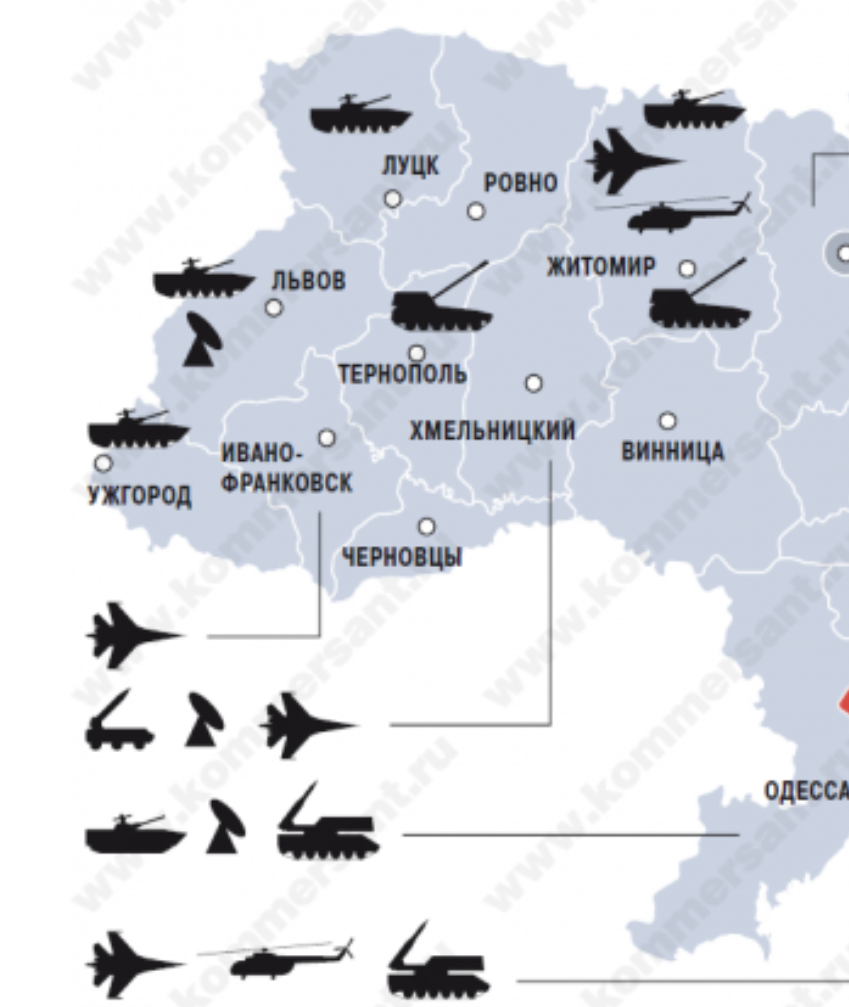 |

To help put all this information into perspective, the following locations will be highlighted on our analytical map:

|  City / Town              | Description                  | Color       |GPS Coordinates                         |
|:--------------------------|:-----------------------------|:------------|:---------------------------------------|
| Brody                     | Russian target               | orange      | 50.07964949726031, 25.14789726393075   |
| Chervonohrad              | Close proximity to Poland    | yellow      | 50.38864370704117, 24.22024077796175   |
| Drohobych                 | Russian target               | orange      | 49.35982342445828, 23.51226274334608   |
| Kovel                     | Russian target               | orange      | 51.212062279280055, 24.69767784490479  |
| Lutsk                     | Russian target               | orange      | 50.75053754033709, 25.32542768798252   |
| Lviv                      | Russian target               | orange      | 49.84308020335804, 24.02958495797037   |
| Novoiavorivske            | Russian target               | orange      | 49.93229549980251, 23.57123156124387   |
| Novovolynsk               | Close proximity to Poland    | yellow      | 50.738025175838295, 24.165612585968507 |
| Rivne                     | Russian target               | orange      | 50.623397651124726, 26.252418594955135 |
| Ternopil                  | Russian target               | orange      | 49.555257538004504, 25.594924488230642 |
| Volodymyr                 | Russian target               | orange      | 50.850011754875986, 24.325617847142993 |

## Create a dictionary to hold these locations

In order to quickly plot these points, we're going to organize the information into a pandas dataframe. The first step is to organize the information into lists:

### Create lists

The first step in creating a dictionary is creating lists of each feature.

In [26]:
# List that stores location name
location_names = ['Brody',
                  'Chervonohrad',
                  'Drohobych',
                  'Kovel',
                  'Lutsk',
                  'Lviv',
                  'Novoiavorivske',
                  'Novovolynsk',
                  'Rivne',
                  'Ternopil',
                  'Volodymyr',
                 ]

In [27]:
# List that stores descriptions of the locations
descriptions_list = ['Russian target',
                     'Close proximity to Poland',
                     'Russian target',
                     'Russian target',
                     'Russian target',
                     'Russian target',
                     'Russian target',
                     'Close proximity to Poland',
                     'Russian target',
                     'Russian target',
                     'Russian target',
                    ]

In [28]:
# List that stores the colors that will be used at each location
location_color_list = ['darkred',
                       'orange',
                       'darkred',
                       'darkred',
                       'darkred',
                       'darkred',
                       'darkred',
                       'orange',
                       'darkred',
                       'darkred',
                       'darkred',
                      ]

In [29]:
# List that stores the GPS Lat of the location
gps_lat = [50.07964949726031,
           50.38864370704117,
           49.35982342445828,
           51.212062279280055,
           50.75053754033709,
           49.84308020335804,
           49.93229549980251,
           50.738025175838295,
           50.623397651124726,
           49.555257538004504,
           50.850011754875986,
          ]

In [30]:
# List that stores the GPS Long of the locations
gps_long = [25.14789726393075,
            24.22024077796175,
            23.51226274334608,
            24.69767784490479,
            25.32542768798252,
            24.02958495797037,
            23.57123156124387,
            24.165612585968507,
            26.252418594955135,
            25.594924488230642,
            24.325617847142993,
           ]

### Put the lists into a dictionary

Next we put the list into a dictionary, you can customize header names in this step:

In [31]:
# Create a dictionary to organize the information
locations_dictionary = {'Location Name' : location_names,
                        'Description' : descriptions_list,
                        'Color' : location_color_list,
                        'GPS Lat' : gps_lat,
                        'GPS Long' : gps_long,
                       }

### Convert the dictionary into a dataframe

The final step is converting the dictionary to a dataframe. A dataframe is a more efficient way of storing the information for analytical purposes.

In [32]:
# Organize the information into a dataframe
locations_df = pd.DataFrame(locations_dictionary)

locations_df

Location Name                Description    Color    GPS Lat   GPS Long
0            Brody             Russian target  darkred  50.079649  25.147897
1     Chervonohrad  Close proximity to Poland   orange  50.388644  24.220241
2        Drohobych             Russian target  darkred  49.359823  23.512263
3            Kovel             Russian target  darkred  51.212062  24.697678
4            Lutsk             Russian target  darkred  50.750538  25.325428
5             Lviv             Russian target  darkred  49.843080  24.029585
6   Novoiavorivske             Russian target  darkred  49.932295  23.571232
7      Novovolynsk  Close proximity to Poland   orange  50.738025  24.165613
8            Rivne             Russian target  darkred  50.623398  26.252419
9         Ternopil             Russian target  darkred  49.555258  25.594924
10       Volodymyr             Russian target  darkred  50.850012  24.325618

### Create an interactive control

The following interactive control will allow a user to place markers on the locations in the dataframe.

In [33]:
# Create a checkbox that allows the user to display the 
# the map markers of these locations
location_data_checkbox = widgets.Checkbox(value = False,
                                          description = 'Include Ukraine Locations?',
                                          disabled = False,
                                          indent = False
                                         )

# Display the map function

In addition to the `radio buttons`, this map will have a checkbox that will also allow us to drop pins on locations in Ukraine, relatively close to the impact site. These sites are both sites that have been targeted by Russia (in crimson) and locations very close to the impact site (in orange).

Using this information will help us better determine the likelihood of an unintentional consequence of war vs a deliberate attack on Poland.

In [34]:
# Generate a map, and link the function paramater to 
# a widget function that allows for interaction
@widgets.interact(weapon = munitions_radio_btn, location_data = location_data_checkbox)
def generate_the_map(weapon, location_data):
    
    # Create a map object
    Map = folium.Map(location = [50.412, 24.0271],
                     zoom_start = 7, # Higher numbers zoom in, smaller numbers zoom out
                     tiles =  'Stamen Toner', 
                                              # 'OpenStreetMap','Stamen Terrain', 'Stamen Toner',
                                              # 'Stamen Watercolor', 'CartoDB dark_matter'
                                              # Look at other maps here: https://leaflet-extras.github.io/leaflet-providers/preview/
                     #attr = 'Stamen Tiles',
                     )  
    
    # Object to create tools that can measure distance
    measure_control = plugins.MeasureControl(position = 'topleft', 
                                             active_color = 'red', 
                                             completed_color = 'green', 
                                             primary_length_unit = 'kilometers',  # 'feet', 'meters', 'miles', 'kilometers'
                                            )
    
    # add measure control to map
    Map.add_child(measure_control);
    
    # Load Polish border into memory
    polish_geojson_file_path = './country_borders(json_files)/poland-detailed-boundary_1006.geojson'
    # Add Poland's border to the map
    folium.GeoJson(data = polish_geojson_file_path, 
               name = "Poland",
               style_function = lambda x: {'fillColor' : 'pink', 'color' : 'red'}
               ).add_to(Map);
    
    # Load Ukraine border into memory
    ukraine_border_geojson_file_path = './country_borders(json_files)/ukraine-detailed-boundary_1059.geojson'
    # Add Ukraine's border to the map
    ukraine_border = folium.GeoJson(data = ukraine_border_geojson_file_path, 
                                name = "Ukraine",
                                ).add_to(Map);
    
    # Load Russian border into memory
    russian_border_geojson_file_path = './country_borders(json_files)/russia-detailed-boundary_1012.geojson'
    # Add Russian border to the map
    russian_border = folium.GeoJson(data = russian_border_geojson_file_path, 
                                name = "Russia",
                                style_function = lambda x: {'fillColor' : 'orange', 'color' : 'orange'}
                                ).add_to(Map);
    
    # Load Belarus border into memory
    belarus_border_geojson_file_path = './country_borders(json_files)/belarus-detailed-boundary_860.geojson'
    #Add Belarus border to the map
    belarus_border = folium.GeoJson(data = belarus_border_geojson_file_path, 
                                name = "Belarus",
                                style_function = lambda x: {'fillColor' : 'green', 'color' : 'green'}
                                ).add_to(Map);
    
    # Drop a pin on the location
    folium.Marker(location = missle_strike_location,
                  popup = "<a href = https://en.wikipedia.org/wiki/2022_missile_explosion_in_Poland > Wikipedia Aritcle </a> (Right Click Link)",
                  icon = folium.Icon(color = 'red', # 'green', 'cadetblue', 'blue', 'white', 'darkblue', 'darkpurple', 'black', 'lightblue', 'pink', 'darkred', 'red', 'gray', 'beige', 'orange', 'darkgreen', 'lightred', 'lightgreen', 'purple', 'lightgray'
                                     prefix = 'glyphicon',
                                     icon = ' glyphicon-map-marker',
                                    ),
                  tooltip = "Missle strike location",
                  ).add_to(Map);  
    
    # The code below will draw a circle with a radius that depends on the chosen weapon
    # If no weapon is selected, don't draw a circle
    if weapon == None:
        pass
    
    if weapon == 'S-300 SAM (100km)':
        # Draw a circle with a radius of an S-300 missle
        # around the missle strike location
        folium.Circle(location = missle_strike_location,
                      radius = 100 * 1000,
                      popup = weapon,
                      color = "purple",
                      fill = True,
                      #fill_color = "purple",
                      ).add_to(Map);
        
    if weapon == 'Kh-59 Cruise Missile (300km)':
        # Draw a circle with a radius of an Kh-59 missle
        # around the missle strike location
        folium.Circle(location = missle_strike_location,
                      radius = 300 * 1000,
                      popup = weapon,
                      color = "purple",
                      fill = True,
                      #fill_color = "purple",
                      ).add_to(Map);
                
    if weapon == 'Shahed 131 Autonomous Drone (900km)':
        # Draw a circle with a radius of an Shahed 131
        # around the missle strike location
        folium.Circle(location = missle_strike_location,
                      radius = 900 * 1000,
                      popup = weapon,
                      color = "purple",
                      fill = True,
                      #fill_color = "purple",
                      ).add_to(Map); 
        
    if weapon == weapon == '3M-54 Kalibr Cruise Missle (2,500km)' or weapon == 'Shahed 136 Autonomous Drone (2,500km)':
        # Draw a circle with a radius of the range of the selected weapon
        # around the missle strike location
        folium.Circle(location = missle_strike_location,
                      radius = 2500 * 1000,
                      popup = weapon,
                      color = "purple",
                      fill = True,
                      #fill_color = "purple",
                      ).add_to(Map);     
        
    if weapon == weapon == 'Kh-55 Cuise Missle (3,000 km)':
        # Draw a circle with a radius of the range of the Kh-55 missle
        # around the missle strike location
        folium.Circle(location = missle_strike_location,
                      radius = 3000 * 1000,
                      popup = weapon,
                      color = "purple",
                      fill = True,
                      #fill_color = "purple",
                      ).add_to(Map); 
    
    if weapon == weapon == 'Kh-101 Cruise Missile (5,500 km)':
        # Draw a circle with a radius of the range of the Kh-101 missle
        # around the missle strike location
        folium.Circle(location = missle_strike_location,
                      radius = 5500 * 1000,
                      popup = weapon,
                      color = "purple",
                      fill = True,
                      #fill_color = "purple",
                      ).add_to(Map);  
    # Add location data if the user desires
    if location_data_checkbox.value == False:
        pass
    if location_data_checkbox.value == True:
        # Add the shapes information to the dataset
        for index in range(locations_df.shape[0]):
            # Drop a pin on the location
            folium.Marker(location = [locations_df.iloc[index]["GPS Lat"], locations_df.iloc[index]["GPS Long"]],
                          popup = locations_df.iloc[index]["Description"],
                          icon = folium.Icon(color = locations_df.iloc[index]["Color"], # 'green', 'cadetblue', 'blue', 'white', 'darkblue', 'darkpurple', 'black', 'lightblue', 'pink', 'darkred', 'red', 'gray', 'beige', 'orange', 'darkgreen', 'lightred', 'lightgreen', 'purple', 'lightgray'
                                             prefix = 'fa',
                                             icon = 'circle',
                                            ),
                          tooltip = locations_df.iloc[index]["Location Name"],
                          ).add_to(Map);  
    
    # Add pop-ups of Lat / Long
    return Map.add_child(folium.LatLngPopup())

interactive(children=(RadioButtons(description='Weapon:', layout=Layout(width='max-content'), options=(None, '…

# Analysis \#3

Given how close the site is to locations that Russia is currently targeting; one can say that the most likely cause of the missile landing in Poland was either:

1. A Russian missile that strayed off course, either through jamming, or anti-aircraft defense. In other words, an unintentional consequence of war.
2. A faulty anti-air defense missile that was either incorrectly guided, or failed to properly track a target and flew into Poland. Again, an unintentional consequence of war.

The image below is the radius of an S-300 missile system. There are 5 locations targeted by Russia within this 100km radius. It's hard not to see this as an unintended consequence.

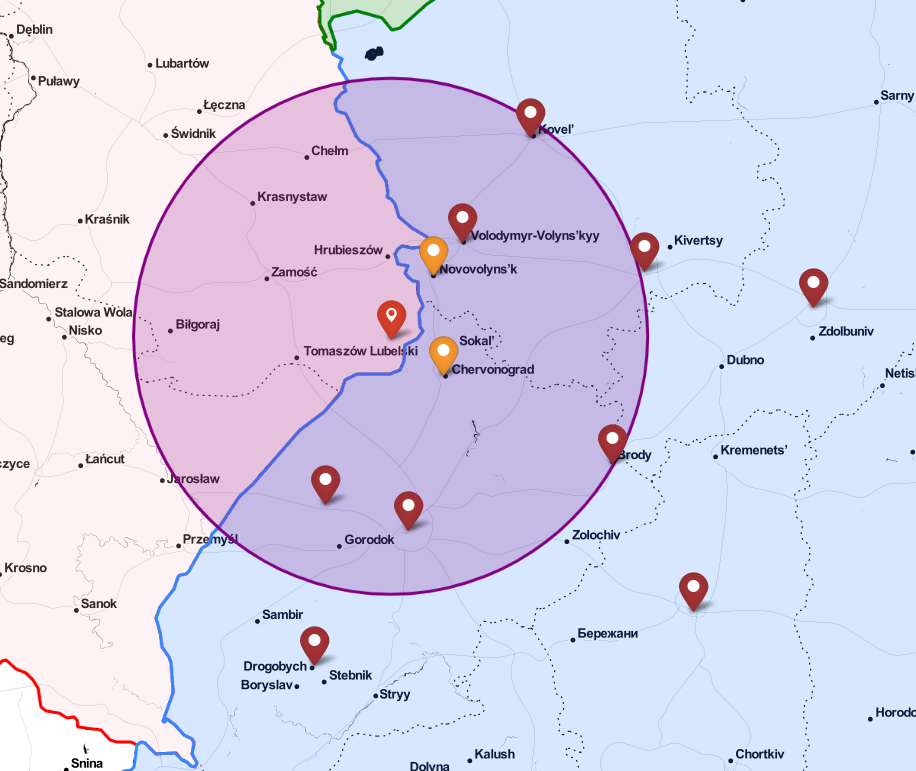

Considering that Russia is currently launching about 100 airstrikes into Ukraine territory per day, since September, and given the close proximity of some of these targets to the Polish border, there is a very high likelihood of an errant / faulty missile inadvertently landing in Polish territory. There is no evidence to suggest this was an intentional act of aggression.

In order for Russia to have deliberately targeted this area, there would need to be a military reason, and there would have been more than one missile launched at it.

In order to verify this assumption, map layers will be added. These map layers will help us analyze the area using different kinds of maps, including satellite imagery in order to understand if there is a military significant target at or around this location. 

## Interactive Controls

Build more controls in order to change the basemap. This will allow an assessment of the terrain to determine if the area could potentially be a military target.

### Dropdown

In [35]:
# Create a map selection list
base_map_list = ['Stamen Toner',
                 'Stamen Terrain',
                 'Open Street Map (Hot)',
                 'Open Topo Map',
                 'Esri World Imagery',
                 'MtbMap',
                ]

In [36]:
# Create a dropdown
base_map_drop_down = widgets.Dropdown(options = base_map_list,
                                      value = 'Stamen Toner',
                                      description = 'BaseMap:',
                                     )

### Checkbox

This checkbox will create a blast radius around the missile site:

> 50m radius will be in Black

> 100m radius in Red

> 150m radius in Orange

> 200m radius in Yellow

In [37]:
# Create a checkbox that allows the user to display the 
# the blast radius
blast_radius_checkbox = widgets.Checkbox(value = False,
                                         description = 'Include blast radius?',
                                         disabled = False,
                                         indent = False
                                         )

# Display the map function

This map function adds another `checkbox` that allows the user to see the blast radius in increments of 50m, 100m, 150m, 200m at the crash site. It's to assess areas of damage and destruction caused by the weapon. 

It also provides a `dropdown` so the user can change the basemap. The user will be allowed to select from the following basemaps:

> Stamen Toner

> Stamen Terrain

> Open Street Map (Hot)

> Open Topo Map

> Esri World Imagery

> MtbMap

Using these basemaps, including satellite imagery, one can make a determination if the area has any military significance / importance. If not, then it's less likely the attack was intentional.

In [38]:
# Generate a map, and link the function paramater to 
# a widget function that allows for interaction
@widgets.interact(weapon = munitions_radio_btn, location_data = location_data_checkbox, base_map_choice = base_map_drop_down, blast_radius = blast_radius_checkbox)
def generate_the_map(weapon, location_data, blast_radius, base_map_choice):
    
    # Allow the user to change the basemap
    if base_map_choice == 'Stamen Toner':
        base_map = 'Stamen Toner'
        map_attr = None
    
    if base_map_choice == 'Stamen Terrain':
        base_map = 'Stamen Terrain'
        map_attr = None
        
    if base_map_choice == 'Open Street Map (Hot)':
        base_map = 'https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png'
        map_attr = 'Open Street Map (Hot)'
        
    if base_map_choice == 'Open Topo Map':
        base_map = 'https://{s}.tile.opentopomap.org/{z}/{x}/{y}.png'
        map_attr = 'Open Topo Map'
    
    if base_map_choice == 'Esri World Imagery':
        base_map = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}'
        map_attr = 'Open Topo Map'
    
    if base_map_choice == 'MtbMap':
        base_map = 'http://tile.mtbmap.cz/mtbmap_tiles/{z}/{x}/{y}.png'
        map_attr = 'MtbMap'
    
    # Create a map object
    Map = folium.Map(location = [50.412, 24.0271],
                     zoom_start = 7, # Higher numbers zoom in, smaller numbers zoom out
                     tiles =  base_map, 
                                              # 'OpenStreetMap','Stamen Terrain', 'Stamen Toner',
                                              # 'Stamen Watercolor', 'CartoDB dark_matter'
                                              # Look at other maps here: https://leaflet-extras.github.io/leaflet-providers/preview/
                     attr = map_attr,
                     )  
    
    # Object to create tools that can measure distance
    measure_control = plugins.MeasureControl(position = 'topleft', 
                                             active_color = 'red', 
                                             completed_color = 'green', 
                                             primary_length_unit = 'kilometers',  # 'feet', 'meters', 'miles', 'kilometers'
                                            )
    
    # add measure control to map
    Map.add_child(measure_control);
    
    # Load Polish border into memory
    polish_geojson_file_path = './country_borders(json_files)/poland-detailed-boundary_1006.geojson'
    # Add Poland's border to the map
    folium.GeoJson(data = polish_geojson_file_path, 
               name = "Poland",
               style_function = lambda x: {'fillColor' : 'pink', 'color' : 'red'}
               ).add_to(Map);
    
    # Load Ukraine border into memory
    ukraine_border_geojson_file_path = './country_borders(json_files)/ukraine-detailed-boundary_1059.geojson'
    # Add Ukraine's border to the map
    ukraine_border = folium.GeoJson(data = ukraine_border_geojson_file_path, 
                                name = "Ukraine",
                                ).add_to(Map);
    
    # Load Russian border into memory
    russian_border_geojson_file_path = './country_borders(json_files)/russia-detailed-boundary_1012.geojson'
    # Add Russian border to the map
    russian_border = folium.GeoJson(data = russian_border_geojson_file_path, 
                                name = "Russia",
                                style_function = lambda x: {'fillColor' : 'orange', 'color' : 'orange'}
                                ).add_to(Map);
    
    # Load Belarus border into memory
    belarus_border_geojson_file_path = './country_borders(json_files)/belarus-detailed-boundary_860.geojson'
    #Add Belarus border to the map
    belarus_border = folium.GeoJson(data = belarus_border_geojson_file_path, 
                                name = "Belarus",
                                style_function = lambda x: {'fillColor' : 'green', 'color' : 'green'}
                                ).add_to(Map);
    
    # Drop a pin on the location
    folium.Marker(location = missle_strike_location,
                  popup = "<a href = https://en.wikipedia.org/wiki/2022_missile_explosion_in_Poland > Wikipedia Aritcle </a> (Right Click Link)",
                  icon = folium.Icon(color = 'red', # 'green', 'cadetblue', 'blue', 'white', 'darkblue', 'darkpurple', 'black', 'lightblue', 'pink', 'darkred', 'red', 'gray', 'beige', 'orange', 'darkgreen', 'lightred', 'lightgreen', 'purple', 'lightgray'
                                     prefix = 'glyphicon',
                                     icon = ' glyphicon-map-marker',
                                    ),
                  tooltip = "Missle strike location",
                  ).add_to(Map);
    
    # The code below will draw a circle with a radius that depends on the chosen weapon
    # If no weapon is selected, don't draw a circle
    if weapon == None:
        pass
    
    if weapon == 'S-300 SAM (100km)':
        # Draw a circle with a radius of an S-300 missle
        # around the missle strike location
        folium.Circle(location = missle_strike_location,
                      radius = 100 * 1000,
                      popup = weapon,
                      color = "purple",
                      fill = True,
                      #fill_color = "purple",
                      ).add_to(Map);
        
    if weapon == 'Kh-59 Cruise Missile (300km)':
        # Draw a circle with a radius of an Kh-59 missle
        # around the missle strike location
        folium.Circle(location = missle_strike_location,
                      radius = 300 * 1000,
                      popup = weapon,
                      color = "purple",
                      fill = True,
                      #fill_color = "purple",
                      ).add_to(Map);
                
    if weapon == 'Shahed 131 Autonomous Drone (900km)':
        # Draw a circle with a radius of an Shahed 131
        # around the missle strike location
        folium.Circle(location = missle_strike_location,
                      radius = 900 * 1000,
                      popup = weapon,
                      color = "purple",
                      fill = True,
                      #fill_color = "purple",
                      ).add_to(Map); 
        
    if weapon == weapon == '3M-54 Kalibr Cruise Missle (2,500km)' or weapon == 'Shahed 136 Autonomous Drone (2,500km)':
        # Draw a circle with a radius of the range of the selected weapon
        # around the missle strike location
        folium.Circle(location = missle_strike_location,
                      radius = 2500 * 1000,
                      popup = weapon,
                      color = "purple",
                      fill = True,
                      #fill_color = "purple",
                      ).add_to(Map);     
        
    if weapon == weapon == 'Kh-55 Cuise Missle (3,000 km)':
        # Draw a circle with a radius of the range of the Kh-55 missle
        # around the missle strike location
        folium.Circle(location = missle_strike_location,
                      radius = 3000 * 1000,
                      popup = weapon,
                      color = "purple",
                      fill = True,
                      #fill_color = "purple",
                      ).add_to(Map); 
    
    if weapon == weapon == 'Kh-101 Cruise Missile (5,500 km)':
        # Draw a circle with a radius of the range of the Kh-101 missle
        # around the missle strike location
        folium.Circle(location = missle_strike_location,
                      radius = 5500 * 1000,
                      popup = weapon,
                      color = "purple",
                      fill = True,
                      #fill_color = "purple",
                      ).add_to(Map);  
        
    # Add location data if the user desires
    if location_data_checkbox.value == False:
        pass
    if location_data_checkbox.value == True:
        # Add the shapes information to the dataset
        for index in range(locations_df.shape[0]):
            # Drop a pin on the location
            folium.Marker(location = [locations_df.iloc[index]["GPS Lat"], locations_df.iloc[index]["GPS Long"]],
                          popup = locations_df.iloc[index]["Description"],
                          icon = folium.Icon(color = locations_df.iloc[index]["Color"], # 'green', 'cadetblue', 'blue', 'white', 'darkblue', 'darkpurple', 'black', 'lightblue', 'pink', 'darkred', 'red', 'gray', 'beige', 'orange', 'darkgreen', 'lightred', 'lightgreen', 'purple', 'lightgray'
                                             prefix = 'fa',
                                             icon = 'circle',
                                            ),
                          tooltip = locations_df.iloc[index]["Location Name"],
                          ).add_to(Map);  
     
    # List of radius
    radius_list = [200, 150, 100, 50]
    # List of colors
    color_list = ['yellow', 'orange', 'red', 'black']
    
    # Don't draw the blast radius
    if blast_radius == False:
        pass
    
    # Draw blast radius to gauge the extent of possible 
    # damage from the missle strike
    if blast_radius == True:
        for radius, color in zip(radius_list, color_list):
            # Draw a circle with a radius of an S-300 missle
            # around the missle strike location
            folium.Circle(location = missle_strike_location,
                          radius = radius,
                          popup = f"{radius}m blast radius",
                          color = color,
                          fill = True,
                          #fill_color = "purple",
                          ).add_to(Map);
    
    # Display the map
    # Add pop-ups of Lat / Long
    return Map.add_child(folium.LatLngPopup())

interactive(children=(RadioButtons(description='Weapon:', layout=Layout(width='max-content'), options=(None, '…

# Analysis \#4

There doesn't appear to be any military targets near or around the vicinity of the missile strike. The missile strike itself was in a farmers field, the following picture shows blasts radius at:
* 50m (black)
* 100m (red)
* 150m (orange)
* 200m (yellow)

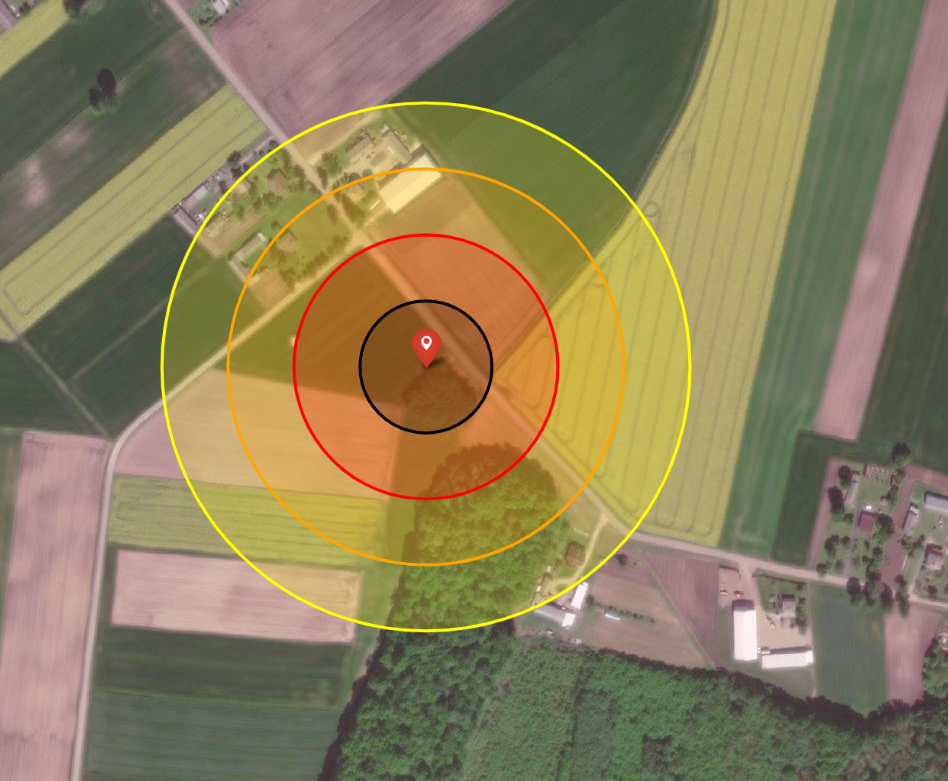

Based on this image, it's clear there are no military targets in this area. However; there are several targets in the Ukraine that are near this area. It's highly likely that an errant missile was the cause of this incident. Russia would not intentionally strike a NATO country. The consequences would not be in Russia's favour.

# Conclusion

There is no direct evidence that Russia intentionally attacked Poland. There is no reason for Russia to have attacked Poland at this location. If this were an intentional attack by Russia, there would be a military target in this area, and Russia would have used more than one missile. 

As it stands, this incident needs to be considered an unintentional consequence of war. The US, and NATO have been responsible for several "unintended consequences" in Iraq and Afghanistan. Thus, Russia should be held to the same standards.

In [39]:
@widgets.interact(point = lat_long_convert_widget)
def convert_string_to_float(point):
    if point == '':
        print("No Point to convert")
        return
    else:
        point = point.split(' ')
        point = [point[1], point[3]]
        point = list(map(float, point))

    return point

interactive(children=(Text(value='', description='Convert', layout=Layout(width='max-content')), Output()), _d…